In [9]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

CSV_PATH = "gtzan_features.csv" 
df = pd.read_csv(CSV_PATH)

print("Data shape:", df.shape)
df.head()

Data shape: (999, 53)


,mfcc_1_mean,mfcc_1_std,mfcc_2_mean,mfcc_2_std,mfcc_3_mean,mfcc_3_std,mfcc_4_mean,mfcc_4_std,mfcc_5_mean,mfcc_5_std,...,centroid_std,bandwidth_mean,bandwidth_std,rolloff_mean,rolloff_std,rms_mean,rms_std,tempo,label,filename
0,-113.598820,50.688946,121.57067,17.200207,-19.162262,15.348761,42.363937,12.289782,-6.362266,12.961207,...,360.202005,2002.412407,292.975102,3805.723030,949.343413,0.130184,0.053183,123.046875,blues,blues.00000.wav
1,-207.523830,88.142525,123.98514,23.662490,8.947019,23.923552,35.867150,16.270117,2.909594,16.732485,...,613.119490,2038.987608,462.498760,3550.713616,1725.778347,0.095908,0.048711,67.999589,blues,blues.00001.wav
2,-90.757164,57.601100,140.44087,22.557840,-29.084547,20.299370,31.686693,11.998093,-13.976547,12.476432,...,395.564168,1747.754087,276.216244,3042.410115,885.511646,0.175473,0.052449,161.499023,blues,blues.00002.wav
3,-199.575130,74.217700,150.08610,21.361393,5.663404,16.034643,26.855278,12.584162,1.770071,16.369904,...,429.378632,1596.422564,408.107638,2184.879029,1221.915647,0.141040,0.079672,63.024009,blues,blues.00003.wav
4,-160.354170,72.104810,126.20948,29.210808,-35.581394,18.276552,22.139256,13.919527,-32.473550,18.341904,...,585.874983,1748.410758,297.285560,3579.957471,1253.928347,0.091501,0.048013,135.999178,blues,blues.00004.wav


In [10]:
X = df.drop(columns=["label", "filename"], errors="ignore")
y = df["label"]

print("Feature matrix shape:", X.shape)
print("Example labels:", y.unique())

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

num_classes = len(label_encoder.classes_)
print("Number of classes:", num_classes)
print("Class mapping:", dict(zip(label_encoder.classes_, range(num_classes))))

Feature matrix shape: (999, 51)
Example labels: ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Number of classes: 10
Class mapping: {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.3,
    random_state=42,
    stratify=y_encoded
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train shape: (699, 51) Test shape: (300, 51)


In [12]:
import os
import sys

if "src" in os.listdir("."):
    sys.path.append("./src")

from models import build_knn, build_decision_tree, build_random_forest, build_xgboost, build_svm

knn = build_knn()
dt = build_decision_tree()
rf = build_random_forest()
xgb = build_xgboost(num_classes=num_classes)
svm = build_svm()

models = {
    "KNN": knn,
    "Decision Tree": dt,
    "Random Forest": rf,
    "XGBoost": xgb,
    "SVM": svm,
}
models

{'KNN': KNeighborsClassifier(n_neighbors=19),
 'Decision Tree': DecisionTreeClassifier(random_state=42),
 'Random Forest': RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.8, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='mlogloss',
               feature_types=None, feature_weights=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.05, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=6, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=300, n_jobs=-1, num_class=10, ...),
 'SVM': SVC(C=10.0, probability=Tr

In [13]:
results = {}

for name, model in models.items():
    print(f"\n==== Training {name} ====")
    model.fit(X_train_scaled, y_train)  
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"{name} Accuracy: {acc:.4f}")

print("\nSummary of accuracies:")
for name, acc in results.items():
    print(f"{name:15s}: {acc:.4f}")


==== Training KNN ====
KNN Accuracy: 0.6000

==== Training Decision Tree ====
Decision Tree Accuracy: 0.4367

==== Training Random Forest ====
Random Forest Accuracy: 0.6667

==== Training XGBoost ====
XGBoost Accuracy: 0.7200

==== Training SVM ====
SVM Accuracy: 0.7467

Summary of accuracies:
KNN            : 0.6000
Decision Tree  : 0.4367
Random Forest  : 0.6667
XGBoost        : 0.7200
SVM            : 0.7467


In [14]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"Best model: {best_model_name}, Accuracy = {results[best_model_name]:.4f}")

y_pred_best = best_model.predict(X_test_scaled)

print("\nClassification report:")
print(
    classification_report(
        y_test,
        y_pred_best,
        target_names=label_encoder.classes_
    )
)

Best model: SVM, Accuracy = 0.7467

Classification report:
              precision    recall  f1-score   support

       blues       0.79      0.73      0.76        30
   classical       0.92      0.80      0.86        30
     country       0.78      0.83      0.81        30
       disco       0.60      0.60      0.60        30
      hiphop       0.69      0.67      0.68        30
        jazz       0.74      0.93      0.82        30
       metal       0.82      0.93      0.88        30
         pop       0.80      0.80      0.80        30
      reggae       0.68      0.70      0.69        30
        rock       0.64      0.47      0.54        30

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.74       300
weighted avg       0.75      0.75      0.74       300



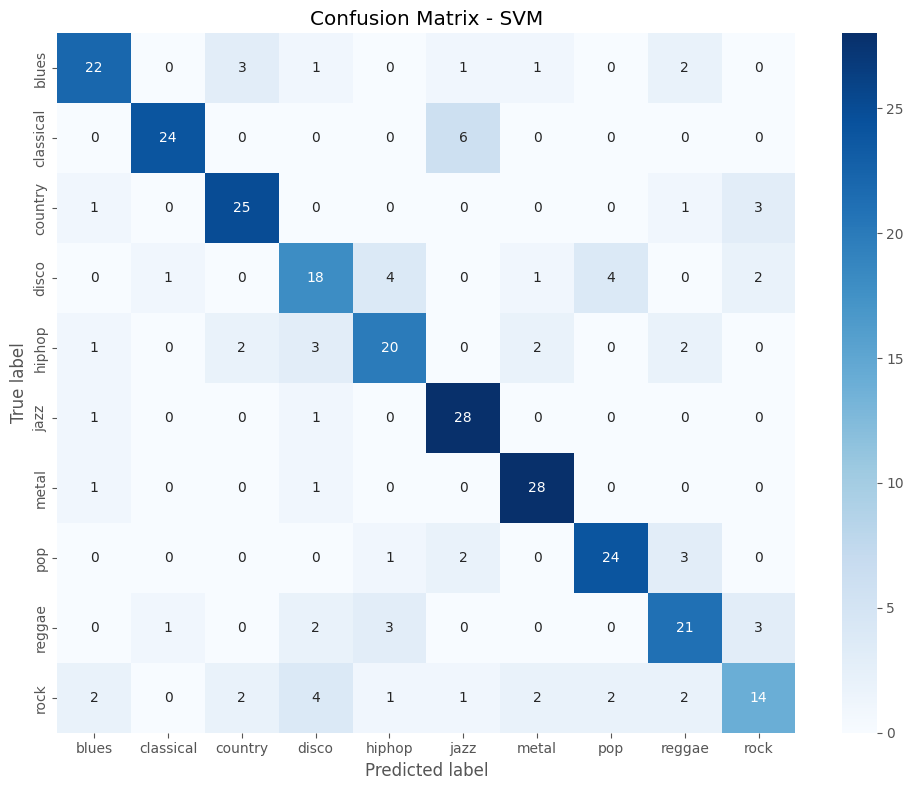

In [15]:
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()


In [16]:
import joblib

os.makedirs("saved_models", exist_ok=True)

joblib.dump(scaler, "saved_models/scaler.pkl")
print("Saved scaler to saved_models/scaler.pkl")

for name, model in models.items():
    path = f"saved_models/{name.replace(' ', '_').lower()}.pkl"
    joblib.dump(model, path)
    print(f"Saved {name} to {path}")


Saved scaler to saved_models/scaler.pkl
Saved KNN to saved_models/knn.pkl
Saved Decision Tree to saved_models/decision_tree.pkl
Saved Random Forest to saved_models/random_forest.pkl
Saved XGBoost to saved_models/xgboost.pkl
Saved SVM to saved_models/svm.pkl
